# Data Visualation

This jupyter notebook visualizes the data transformations performed in Hive and Pig. 

## Importing required libaries

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

## Load the transformed tsv files

In [230]:
genres_grouped = pd.read_csv('data/genres-grouped.tsv' ,sep='\t', names = ['decade','genre','user_count','average_rating','std_rating'])
movie_ratings = pd.read_csv('data/movie-ratings-joined.tsv' ,sep='\t', names=['userid','rating','movieid','title','year','genres'])
most_liked_movies= pd.read_csv('data/most-liked-movies.tsv', sep='\t', names=['userid','rating','movieid','title','year','genres'])
popular_tags = pd.read_csv('data/most-liked-movies-tags.tsv', sep='\t', names=['unigram','frequency'])
unpopular_tags = pd.read_csv('data/unpopular-movies-tags.tsv', sep='\t', names=['unigram','frequency'])
genres_exploaded = pd.read_csv('data/genres-exploaded.tsv' ,sep='\t', names=['year','title','movieid','rating','genre'])

C:\Users\tonyr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Boxplots of genres vs raings 

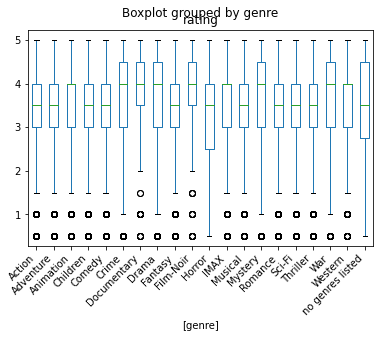

In [231]:
genres_exploaded.boxplot(column=['rating'], by=['genre'],grid=False, rot=45)
plt.xticks(ha='right')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

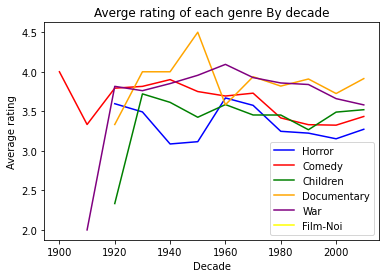

In [218]:
wanted_genres = ['Horror', 'Comedy', 'Children', 'Documentary', 'War', 'Film-Noi']
colours = ['blue','red','green','orange', 'purple','yellow']
for genre, colour  in zip(wanted_genres, colours):
    
    genre_df = genres_grouped[genres_grouped['genre'] == genre]
    
    plt.plot(
    genre_df['decade'], genre_df['average_rating'],
    c=colour,
    label=genre
    )
plt.title("Averge rating of each genre By decade")
plt.xlabel("Decade")
plt.ylabel("Average rating")
plt.legend(scatterpoints=1)
plt.show()


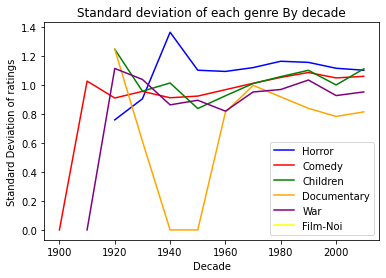

In [219]:

for genre, colour  in zip(wanted_genres, colours):
    
    genre_df = genres_grouped[genres_grouped['genre'] == genre]
    plt.plot(
    genre_df['decade'], genre_df['std_rating'],
    c=colour,
    label=genre
    )
plt.title("Standard deviation of each genre By decade")
plt.xlabel("Decade")
plt.ylabel("Standard Deviation of ratings")
plt.legend(scatterpoints=1)
plt.show()



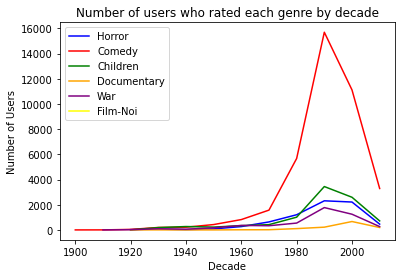

In [220]:
for genre, colour  in zip(wanted_genres, colours):
    
    genre_df = genres_grouped[genres_grouped['genre'] == genre]
    plt.plot(
    genre_df['decade'], genre_df['user_count'],
    c=colour,
    label=genre
    )
plt.title("Number of users who rated each genre by decade")
plt.xlabel("Decade")
plt.ylabel("Number of Users")
plt.legend(scatterpoints=1)
plt.show()
   

Word cloud of tags from unpopular and popular movies

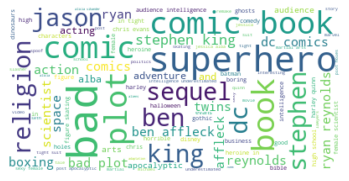

In [225]:
## Unpopular wordclod
d = {}
for a, x in unpopular_tags.values:
    d[a] = x

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

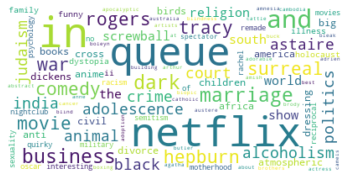

In [222]:
## popular word cloud
d = {}
for a, x in popular_tags.values:
    d[a] = x

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Rating density plot of ratings. The background histogram details the ratings of each genre. Each coloured line corresponds to the KDE of ratings by genre.

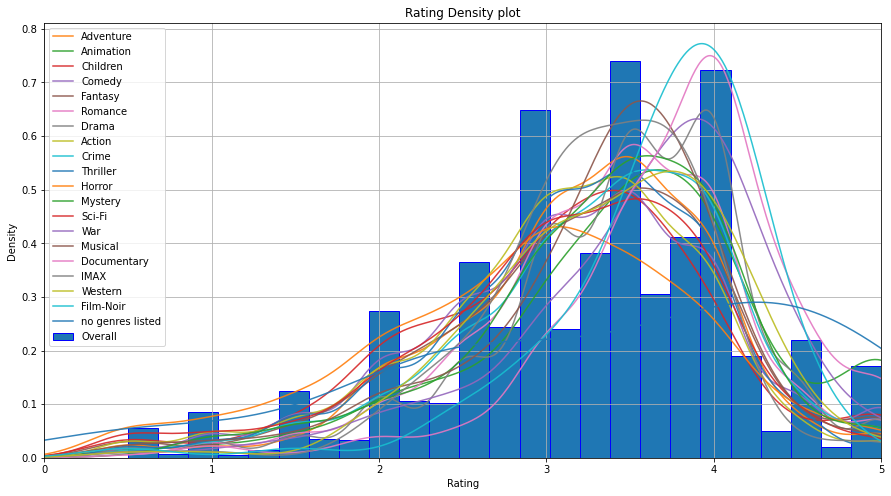

In [228]:
df_temp = genres_exploaded[['movieid','rating']].groupby('movieid').mean()
# Histogram of all ratings
df_temp.hist(bins=25, grid=False, edgecolor='b', density=True, label ='Overall', figsize=(15,8))
# KDE plot per genre
for genre in genres_exploaded['genre'].unique():
    df_temp = genres_exploaded[genres_exploaded['genre']==genre][['movieid','rating']].groupby('movieid').mean()
    df_temp.rating.plot(grid=True, alpha=0.9, kind='kde', label=genre)
plt.legend()
plt.xlim(0,5)
plt.xlabel('Rating')
plt.title('Rating Density plot')
plt.show()